<a href="https://colab.research.google.com/github/horasan/ml/blob/main/ceb_1_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from google.colab import drive



In [2]:
# read data from google drive
drive.mount('/content/drive')
DRIVE_DATASET_PATH = "/content/drive/My Drive/Colab Notebooks/datasets/"

Mounted at /content/drive


In [3]:
df_simple = pd.read_csv(DRIVE_DATASET_PATH + "amsterdam_house_simple_2.csv")
df_simple["app_area"] = ((df_simple["Area"]/(10)).astype(int)*10).astype(str)
df_simple["app_price"] = ((df_simple["Price"]/(10**3)).astype(int)).astype(str) + "*" +"10^3"

print("Total # of (rows, columns): ", df_simple.shape)
df_simple
df_price_area_ratio = (df_simple.Price / df_simple.Area).to_list()
avg_price_per_m2 = sum(df_price_area_ratio) / len(df_price_area_ratio) # ~ 4.275 Euro/m2
print("Average price for m2: ", avg_price_per_m2)
#df_simple
#NOTE[1]: An estimation function might be: f(x) = 4.275*x (where x is the area in m2)

Total # of (rows, columns):  (10, 4)
Average price for m2:  4275.022755236705


In [4]:
#df_simple.describe()

**Lets plot the relation between Area and Price**

In [5]:
#plt.scatter(df_simple['Area'], df_simple['Price'], c="blue", s=100, alpha=0.2)
df_simple

,Area,Price,app_area,app_price
0,61,300400,60,300*10^3
1,128,520500,120,520*10^3
2,92,370010,90,370*10^3
3,77,296000,70,296*10^3
4,204,804200,200,804*10^3
5,148,750030,140,750*10^3
6,105,560234,100,560*10^3
7,311,1000124,310,1000*10^3
8,252,900489,250,900*10^3
9,82,390200,80,390*10^3


Here, we can easily identify the correlation between price and area.

It seems f(x) = a*x + b, where a is slope, b is the shift value in x axis.

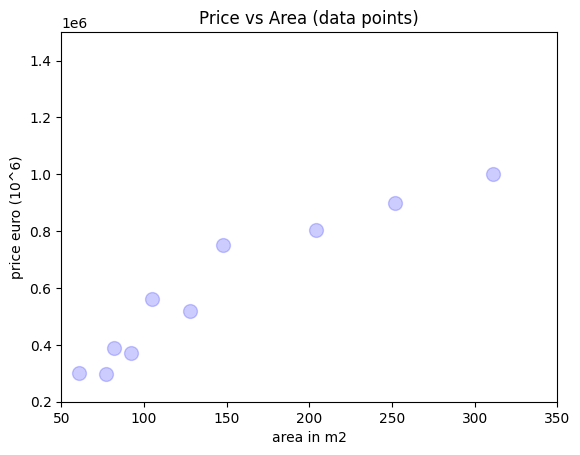

In [6]:
fig, ax = plt.subplots()
plt.title("Price vs Area (data points)")
plt.xlabel("area in m2")
plt.ylabel("price euro (10^6)")
ax.set_xlim([50, 350])
ax.set_ylim([200000, 1500000])
plt.scatter(df_simple['Area'], df_simple['Price'], c="blue", s=100, alpha=0.2)
#plt.axvline(x=30, color="purple", linestyle="--")
#plt.axhline(y=75, color="purple", linestyle="--")

ok, now lets try to figure out the f(x) = a*x + b functions.

Some possible functions are


1.  f1(x) = 0 + (1 * x1) * 10**4
2.  f2(x) = 50000 + (0.5 * x1) * 10**4
3.  f3(x) = 180000 + (0.3 * x1) * 10**4

But which function does represent the existing features (so that future predictions are to be as accurate as possible)?



In [7]:
# lets plot the functions on the price vs area figure.
x1 = np.linspace(0, 350, 1000) # from, to, 1000 points
w_1_1 = 1
w_1_0 = 0
y1 = w_1_0 + (w_1_1 * x1) * 10**4

w_2_1 = 0.5
w_2_0 = 50000
y2 = w_2_0 + (w_2_1 * x1) * 10**4

w_3_1 = 0.3
w_3_0 = 180000
y3 = w_3_0 + (w_3_1 * x1) * 10**4


plot the data points and possible linear equations

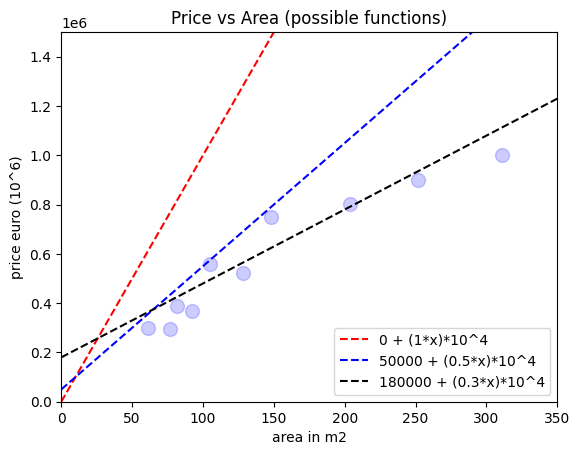

In [8]:

fig, ax = plt.subplots()
plt.title("Price vs Area (possible functions)")
plt.xlabel("area in m2")
plt.ylabel("price euro (10^6)")
ax.plot(x1, y1, color="red", linestyle="--", label=f"{w_1_0} + ({w_1_1}*x)*10^4")
ax.plot(x1, y2, color="blue", linestyle="--", label=f"{w_2_0} + ({w_2_1}*x)*10^4")
ax.plot(x1, y3, color="black", linestyle="--", label=f"{w_3_0} + ({w_3_1}*x)*10^4")
ax.set_xlim([0, 350])
ax.set_ylim([0, 1500000])
plt.scatter(df_simple['Area'], df_simple['Price'], c="blue", s=100, alpha=0.2)

#plt.scatter(125, (0 + (1 * 125) * 10**4), c="red", s=100, marker="*") # y1 prediction
#plt.scatter(125, (50000 + (0.5 * 125) * 10**4), c="blue", s=100, alpha=0.5, marker="*") # y2 prediction
#plt.scatter(125, (180000 + (0.3 * 125) * 10**4), c="black", s=100, alpha=0.5, marker="*") # y3 prediction
plt.legend()

#plt.axvline(x=30, color="purple", linestyle="--")
#plt.axhline(y=75, color="purple", linestyle="--")

Lets predict some prices for a 125 m2 house!

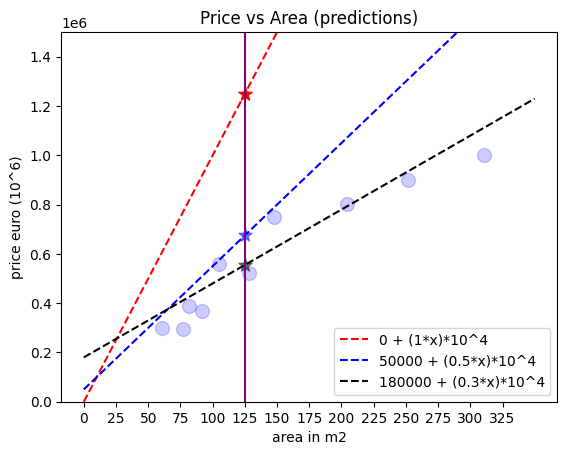

In [9]:

fig, ax = plt.subplots()
plt.title("Price vs Area (predictions)")
plt.xlabel("area in m2")
plt.ylabel("price euro (10^6)")
ax.plot(x1, y1, color="red", linestyle="--", label=f"{w_1_0} + ({w_1_1}*x)*10^4")
ax.plot(x1, y2, color="blue", linestyle="--", label=f"{w_2_0} + ({w_2_1}*x)*10^4")
ax.plot(x1, y3, color="black", linestyle="--", label=f"{w_3_0} + ({w_3_1}*x)*10^4")
#ax.set_xlim([0, 350])
plt.xticks(np.arange(0, 350, step=25))
ax.set_ylim([0, 1500000])
plt.scatter(df_simple['Area'], df_simple['Price'], c="blue", s=100, alpha=0.2)

plt.scatter(125, (0 + (1 * 125) * 10**4), c="red", s=100, marker="*") # y1 prediction
plt.scatter(125, (50000 + (0.5 * 125) * 10**4), c="blue", s=100, alpha=0.5, marker="*") # y2 prediction
plt.scatter(125, (180000 + (0.3 * 125) * 10**4), c="black", s=100, alpha=0.5, marker="*") # y3 prediction
plt.legend()
#plt.axhline(y=75, color="purple", linestyle="--")
plt.axvline(x=125, color="purple", linestyle="-")


In [46]:
w_1_1 = 1
w_1_0 = 0
#y1 = w_1_0 + (w_1_1 * x1) * 10**4
pre_1 = w_1_0 + (w_1_1 * 125) * 10**4
print(f"Prediction for y1 is {pre_1}, w0={w_1_0}, w1={w_1_1}")

w_2_1 = 0.5
w_2_0 = 50000
#y2 = w_2_0 + (w_2_1 * x1) * 10**4
pre_2 = w_2_0 + (w_2_1 * 125) * 10**4
print(f"Prediction for y2 is {pre_2}, w0={w_2_0}, w1={w_2_1}")

w_3_1 = 0.3
w_3_0 = 180000
#y3 = w_3_0 + (w_3_1 * x1) * 10**4
pre_3 = w_3_0 + (w_3_1 * 125) * 10**4
print(f"Prediction for y3 is {pre_3}, w0={w_3_0}, w1={w_3_1}")

Prediction for y1 is 1250000, w0=0, w1=1
Prediction for y2 is 675000.0, w0=50000, w1=0.5
Prediction for y3 is 555000.0, w0=180000, w1=0.3


y3 = w_3_0 + (w_3_1 * x1) * 10**4 seems to be a better fit!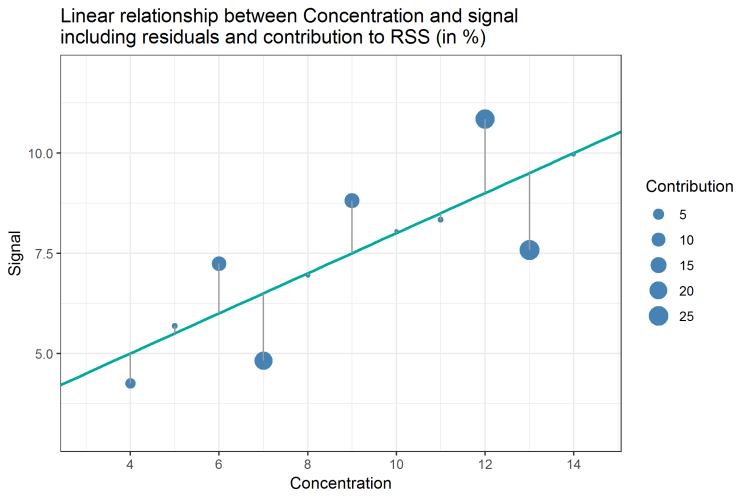

**now lets use sklearn**
Again we will use a linear regression model.

In [32]:
from sklearn import linear_model
# read the dataset again.
df_simple = pd.read_csv(DRIVE_DATASET_PATH + "amsterdam_house_simple_2.csv")
df_simple


,Area,Price
0,61,300400
1,128,520500
2,92,370010
3,77,296000
4,204,804200
5,148,750030
6,105,560234
7,311,1000124
8,252,900489
9,82,390200


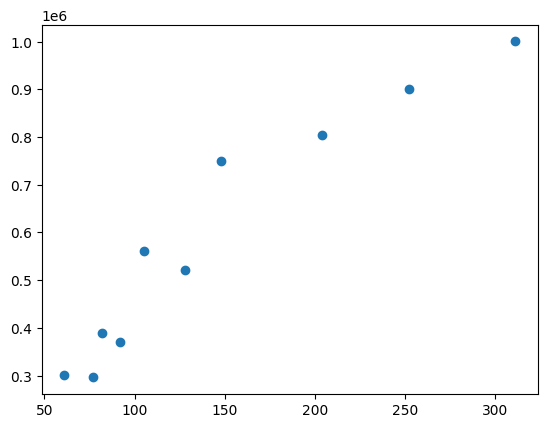

In [16]:
# again scatter plot
plt.scatter(df_simple.Area, df_simple.Price)

# lets start to build the linear regression ML model.

In [33]:
reg_model = linear_model.LinearRegression()
# fitting the data: training the model (in this case a linear regression model) with the training data
reg_model.fit(df_simple[["Area"]], df_simple.Price)
print("Model training is done!")

Model training is done!


Lets predict a price for 125 m2

In [50]:
#reg_model.predict(125) # ValueError: Expected 2D array, got scalar array instead
pre_ml = reg_model.predict(np.array(125).reshape(1,-1))


print(f"Prediction for y1 is {pre_1}, w0={w_1_0}, w1={w_1_1}")
print(f"Prediction for y2 is {pre_2}, w0={w_2_0}, w1={w_2_1}")
print(f"Prediction for y3 is {pre_3}, w0={w_3_0}, w1={w_3_1}")

print("Prediction with LinearRegression model is ", pre_ml[0].astype(int))

Prediction for y1 is 1250000, w0=0, w1=1
Prediction for y2 is 675000.0, w0=50000, w1=0.5
Prediction for y3 is 555000.0, w0=180000, w1=0.3
Prediction with LinearRegression model is  527264


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

ok, what is happing inside the **linear_model.LinearRegression**?
- Model tried to fit a linear function
    * f(x) = w0 + w1*x
    * fitting means finding **w0** and **w1** values

1) Slope(w1) and intercept(w0) is calculated with the training data points.

2) Ordinary least squares Linear Regression: ...  [**to minimize the residual sum of squares**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) between the observed targets ...

3) Figure 3 https://mpl.loesungsfabrik.de/en/english-blog/method-validation/sum-of-quares-part1




In [56]:
print(f"Prediction for y1 is {pre_1}, w0={w_1_0}, w1={w_1_1}")
print(f"Prediction for y2 is {pre_2}, w0={w_2_0}, w1={w_2_1}")
print(f"Prediction for y3 is {pre_3}, w0={w_3_0}, w1={w_3_1}")

print(f"Prediction with LinearRegression model is {pre_ml[0].astype(int)}, w0={reg_model.intercept_.astype(int)}, w1={reg_model.coef_[0].astype(int)}, w1/10^4={reg_model.coef_[0].astype(int)/10**4}")
# note that we had multiplied the x value with 10^4.

Prediction for y1 is 1250000, w0=0, w1=1
Prediction for y2 is 675000.0, w0=50000, w1=0.5
Prediction for y3 is 555000.0, w0=180000, w1=0.3
Prediction with LinearRegression model is 527264, w0=158491, w1=2950, w1/10^4=0.295


now lets plot all the linear regression functions we have.

array([ 338452.98030303,  536115.37112299,  429908.71336898,
        385655.93930481,  760329.42638146,  595119.06987522,
        468261.11755793, 1075999.21470588,  901938.30338681,
        400406.86399287])

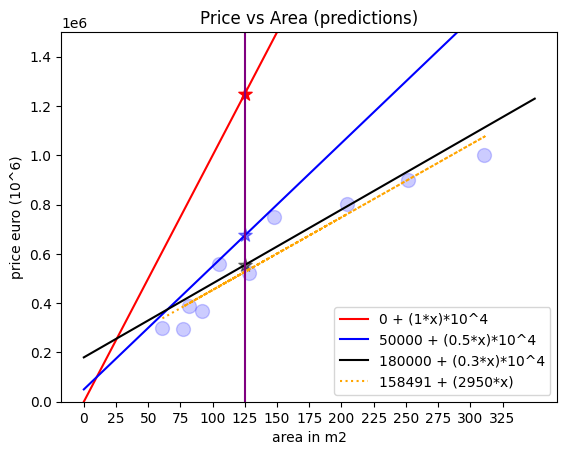

In [72]:
#
fig, ax = plt.subplots()
plt.title("Price vs Area (predictions)")
plt.xlabel("area in m2")
plt.ylabel("price euro (10^6)")
ax.plot(x1, y1, color="red", linestyle="-", label=f"{w_1_0} + ({w_1_1}*x)*10^4")
ax.plot(x1, y2, color="blue", linestyle="-", label=f"{w_2_0} + ({w_2_1}*x)*10^4")
ax.plot(x1, y3, color="black", linestyle="-", label=f"{w_3_0} + ({w_3_1}*x)*10^4")
##
# predictions
##
all_predictions = reg_model.predict(df_simple[['Area']])
ax.plot(df_simple['Area'], all_predictions, color="orange", linestyle=":", label=f"{reg_model.intercept_.astype(int)} + ({reg_model.coef_[0].astype(int)}*x)")
#ax.set_xlim([0, 350])
plt.xticks(np.arange(0, 350, step=25))
ax.set_ylim([0, 1500000])
plt.scatter(df_simple['Area'], df_simple['Price'], c="blue", s=100, alpha=0.2)

plt.scatter(125, (0 + (1 * 125) * 10**4), c="red", s=100, marker="*") # y1 prediction
plt.scatter(125, (50000 + (0.5 * 125) * 10**4), c="blue", s=100, alpha=0.5, marker="*") # y2 prediction
plt.scatter(125, (180000 + (0.3 * 125) * 10**4), c="black", s=100, alpha=0.5, marker="*") # y3 prediction
plt.legend()
#plt.axhline(y=75, color="purple", linestyle="--")
plt.axvline(x=125, color="purple", linestyle="-")
